<a href="https://colab.research.google.com/github/chrisfinan/GenAI/blob/main/HW1/problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chris Finan
> 9/12/24

> Assignment 1 - Problem 1

## Description
* Modify the classify_point function to include the "Coastline" category.

* Use a distance threshold of 10 units for the "Coastline" category.

* Update the plotting function to visualize the new classification.

* Test implementation

# **Spatial Data Analysis and Parametric Modeling**

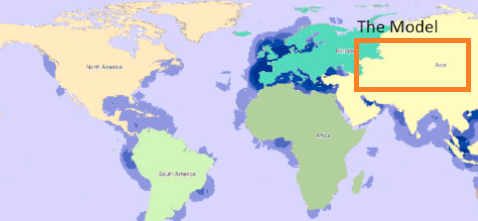

* In geographic information systems (GIS) and spatial data analysis, accurately classifying locations as either **land** or **sea** is a fundamental problem with numerous applications, from environmental monitoring to navigation systems.

* This classification problem involves determining whether a given geographic point falls within a designated land area or lies outside it, often within the context of a predefined **model** or boundary.

* In this example, we address the classification problem by implementing a simplified model that defines a rectangular **box** around known land points.

* Points inside this box are classified as land, while those outside are classified as sea.

* The model uses a set of sample land coordinates to determine the bounds of the box (**model parameters**), which is then used to classify additional test points.

## **Prior Probabilities**



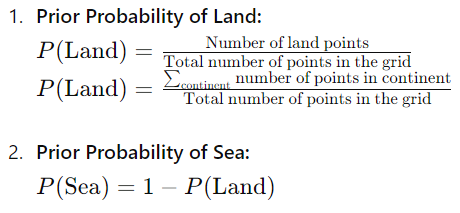

## **Distance Calculations**

* The **Euclidean distance** between a grid point (x,y) and the nearest land point (xi, yi) is calculated using the following formula:

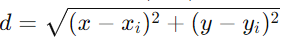


## **Likelihood Calculations**

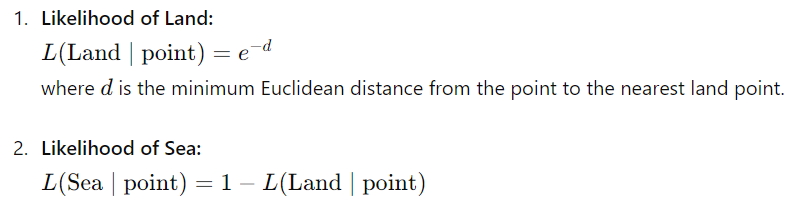

## **Classification**


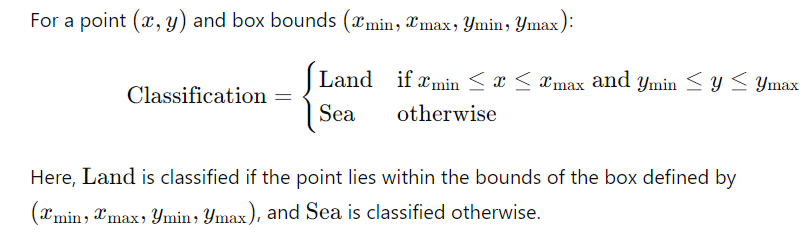



In [17]:
#@title Importing Libraries

# numerical operations
import numpy as np

# used for plotting
import matplotlib.pyplot as plt

# used for calculating distances
from scipy.spatial import distance

In [18]:
#@title Defining Known Land Mass Points

# A dictionary where each key is a continent and the value is a list of tuples
# representing points on that continent.

land_points = {
    'South America': [(-30, -60), (-15, -50), (0, -45), (15, -30), (30, -20)],
    'Australia': [(50, 10), (55, 0), (60, 10), (65, 20), (70, 30)],
    'Asia': [(20, 60), (30, 70), (40, 80), (50, 90), (60, 100)],
    'Africa': [(0, 20), (10, 20), (20, 30), (30, 40), (40, 50)],
    'Europe': [(-35, 140), (-30, 145), (-25, 150), (-20, 155), (-15, 160)]
}


In [19]:
#@title Defining a Grid of Points

# Create a grid of points with latitude ranging from -90 to 90 and longitude
# from -180 to 180 in steps of 10.

grid_points = [(x, y) for x in range(-90, 91, 10) for y in range(-180, 181, 10)]


In [20]:
#@title Calculating Prior Probabilities

# This function calculates the prior probabilities of a point being land or sea based on
# the number of land points versus the total points.

def calculate_prior_probabilities(land_points, total_points):
    P_land = sum(len(points) for points in land_points.values()) / total_points
    P_sea = 1 - P_land

    return P_land, P_sea



In [21]:
#@title Calculating Likelihoods

# This function calculates the likelihoods of points being land or sea based on their distances
# to the nearest land point.

# The likelihood decreases exponentially with increasing distance from land.

def calculate_likelihoods(grid_points, land_points):
    likelihoods_land = {}
    likelihoods_sea = {}

    all_land_points = [point for points in land_points.values() for point in points]

    for point in grid_points:
        distances_to_land = distance.cdist([point], all_land_points, 'euclidean').min()
        likelihoods_land[point] = np.exp(-distances_to_land)  # Exponential decay
        likelihoods_sea[point] = 1 - likelihoods_land[point]  # Opposite of land

    return likelihoods_land, likelihoods_sea

**1. Modify the Classification Function:**
* Update the classify_point function to check if a point is within the distance threshold from any land point and classify it as "Coastline" if true.
* Use the existing distance calculation method to determine if a point is within the threshold (10 units).



In [22]:
#@title Classifying Points

# This function classifies a point as land if it lies within the defined bounds of
# the "land model" box, otherwise classifies it as sea.
# The new addition checks if the point is within 10 miles of any land point (coastline) using the euclidean distance function

def classify_point(point, box_bounds):
    x_min, x_max, y_min, y_max = box_bounds
    #create array that contains only the land points (not continent names)
    all_land_points = [point for points in land_points.values() for point in points]

    if (x_min <= point[0] <= x_max and y_min <= point[1] <= y_max):
      #first checks if the point is already one of the known land points
      if point in all_land_points:
        return 'Land'
      #loops through all land points and measures the euclidean distance between the new point and existing land points to check for coastline
      for land_point in all_land_points:
        if distance.euclidean(point, land_point) <= 10:
          return 'Coastline'
      #the point is not coastline or already existing: it is still in the box, so it is land
      return 'Land'
    #anything outside of the box is classified as sea
    return 'Sea'


**2. Update the Plotting Function**
* Modify the plot_points function to include a new color and legend for "Coastline" points. - Here I used yellow.
* Plot the test points with the updated classification. - See below for plotted points.

In [23]:
#@title Plotting the Points and Model

# This functions plots the land points, test points, and the bounding box of
# the land model on a 2D plot.

#coastline point changed to be yellow

# Function to plot the points and the model
def plot_points(land_points, test_points, test_classifications, box_bounds):
    fig, ax = plt.subplots()

    # Define colors for each continent
    continent_colors = {
        'South America': 'green',
        'Europe': 'red',
        'Asia': 'blue',
        'Africa': 'purple',
        'Australia': 'orange'
    }

    # Plot land points by continent
    for continent, points in land_points.items():
        land_x, land_y = zip(*points)
        ax.scatter(land_x, land_y, color=continent_colors[continent], label=f'{continent}')

    # Highlight land model with an orange box
    x_min, x_max, y_min, y_max = box_bounds
    land_model_x = [x_min, x_max, x_max, x_min, x_min]
    land_model_y = [y_min, y_min, y_max, y_max, y_min]
    ax.plot(land_model_x, land_model_y, color='orange', label='Land Model')

    # Plot test points
    for point, classification in zip(test_points, test_classifications):
        color = 'green' if classification == 'Land' else 'yellow' if classification == 'Coastline' else 'blue'
        ax.scatter(point[0], point[1], color=color, edgecolors='red', label=f'Test Point ({classification})')

    # Place the legend outside the plot box
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Land and Sea Points with Model')
    plt.grid(False)  # Remove grid
    plt.show()



**3. Test the Implementation:**
* Define a new set of test points that include points close to land masses.
* Print the classifications and visualize the results.
> See Set 2


Test Point Classifications:
Point (-20, -40): Land
Point (20, 75): Land
Point (50, 50): Coastline
Point (-30, 160): Land
Point (80, -170): Sea
Point (-55, 150): Sea


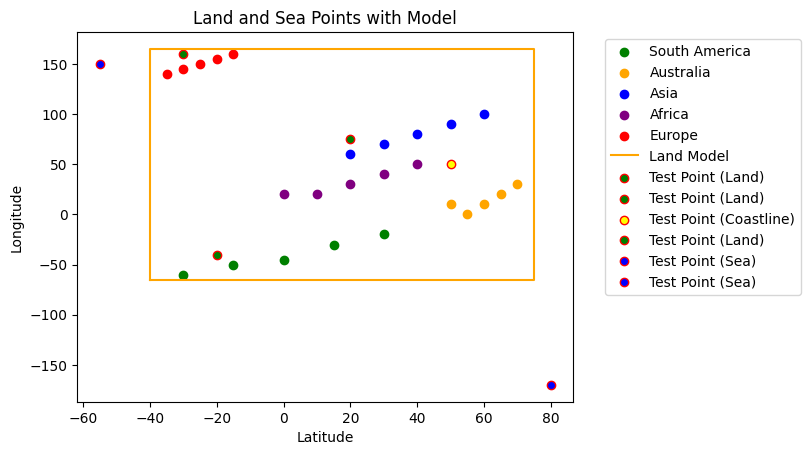


Test Point Classifications (set 2):
Point (100, 0): Sea
Point (0, 100): Land
Point (-30, -60): Land
Point (45, 45): Coastline
Point (-20, 150): Coastline
Point (10, 30): Coastline
Point (60, 90): Coastline
Point (55, 10): Coastline
Point (20, 160): Land
Point (90, 100): Sea


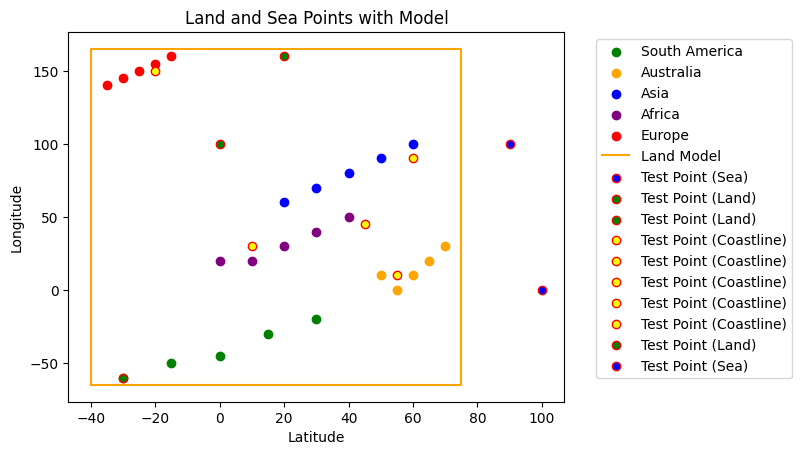

In [24]:
#@title Main Execution

# This section calculates the total grid points, prior probabilities, likelihoods,
# defines the model box, classifies test points, prints the classifications, and
# plots the points and the model.

# Total points in the grid
total_points = len(grid_points)

# Calculate prior probabilities
P_land, P_sea = calculate_prior_probabilities(land_points, total_points)

# Calculate likelihoods
likelihoods_land, likelihoods_sea = calculate_likelihoods(grid_points, land_points)

# Define the bounds of the model box
all_land_x = [point[0] for points in land_points.values() for point in points]
all_land_y = [point[1] for points in land_points.values() for point in points]
x_min, x_max = min(all_land_x) - 5, max(all_land_x) + 5
y_min, y_max = min(all_land_y) - 5, max(all_land_y) + 5
box_bounds = (x_min, x_max, y_min, y_max)


# Define unknown test cases with more land points and fewer sea points
test_points = [
    # Land points inside the model
    (-20, -40), (20, 75), (50, 50), (-30, 160), (80, -170), (-55, 150)
]

# Classify test points
test_classifications = [classify_point(point, box_bounds) for point in test_points]

# Print test point classifications
print("\nTest Point Classifications:")
for point, classification in zip(test_points, test_classifications):
    print(f"Point {point}: {classification}")

# Plot the points and the model
plot_points(land_points, test_points, test_classifications, box_bounds)

#Second set of test points:
test_points2 = [
    (100, 0), (0, 100), (-30, -60), (45, 45), (-20, 150), (10, 30), (60, 90), (55, 10), (20, 160), (90, 100)
]

# Classify test points (set 2)
test_classifications2 = [classify_point(point, box_bounds) for point in test_points2]

print("\nTest Point Classifications (set 2):")
for point, classification in zip(test_points2, test_classifications2):
    print(f"Point {point}: {classification}")

plot_points(land_points, test_points2, test_classifications2, box_bounds)

## Conclusion
> The adjustment to the classify_point function is able to accurately classify points because the land box is clearly defined, separating land and sea. The classification for coastline uses distances between points to ensure unclassified points that are within 10 units of a land point are classified as coastline.
